In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys, copy, emcee, corner

%matplotlib inline
%load_ext autoreload

sys.path.append('./ligbind/')
import ligbind as lb

/Users/michael/miniconda3/envs/fitter/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [93]:
dat1 = lb.WymSim(sets=1,reps=1)

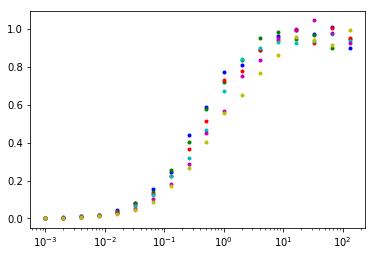

In [94]:
lb.semlog(dat1.ligs,dat1.meanset[0],'.')

In [95]:
def lsfit(parms,rtots,data,ligs):
    datac = np.concatenate(data)
    calc = lb.models.wymfunc(parms,ligs,rtots)
    return (calc-datac)

In [96]:
guess = np.array([10.,10.,10.,100.])

In [97]:
lsbnds = (tuple(1e-3 for i in range(4)),tuple(1000. for i in range(4)))

In [98]:
sp.optimize.least_squares(lsfit,guess,args=(dat1.rtot,dat1.meanset[0],dat1.ligs),bounds=lsbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='trf').x

array([  3.12480623e+00,   2.02968885e+00,   1.00000000e-03,
         1.15429942e+02])

In [99]:
dat1.parms

array([   3. ,    2. ,    0.1,  100. ])

In [100]:
def lsfitRTs(rtots,parms,data,ligs):
    datac = np.concatenate(data)
    calc = lb.models.wymfunc(parms,ligs,rtots)
    return (calc-datac)

In [101]:
dat1.rtot

array([ 0.001 ,  0.0025,  0.005 ,  0.01  ,  0.025 ,  0.05  ])

In [102]:
guessRT = np.array([0.005,0.005,0.005,0.005,0.01,0.01])

In [103]:
gRT1 = np.abs(np.random.normal(0.01,0.01,6))
gRT2 = np.abs(np.random.normal(0.01,0.01,6))
gRT3 = np.abs(np.random.normal(0.01,0.01,6))

In [104]:
rtbnds = (tuple(1e-5 for i in range(6)),tuple(1e-1 for i in range(6)))

In [105]:
rt_solve = sp.optimize.least_squares(lsfitRTs,guessRT,args=(dat1.parms,dat1.meanset[0],dat1.ligs),bounds=rtbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='trf').x

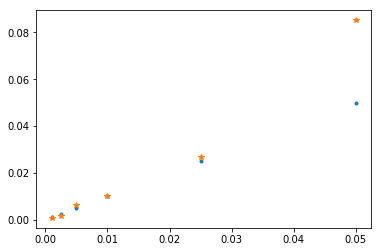

In [106]:
plt.plot(dat1.rtot,dat1.rtot,'.')
plt.plot(dat1.rtot,rt_solve,'*')

In [107]:
sp.optimize.least_squares(lsfitRTs,guessRT,args=(dat1.parms,dat1.meanset[0],dat1.ligs),bounds=rtbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='dogbox').x

array([ 0.00072597,  0.00162081,  0.00604606,  0.01023969,  0.02666544,
        0.08520737])

In [108]:
sp.optimize.least_squares(lsfitRTs,gRT1,args=(dat1.parms,dat1.meanset[0],dat1.ligs),bounds=rtbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='dogbox').x

array([ 0.00072597,  0.00162081,  0.00604606,  0.01023969,  0.02666544,
        0.08520737])

In [109]:
sp.optimize.least_squares(lsfitRTs,gRT2,args=(dat1.parms,dat1.meanset[0],dat1.ligs),bounds=rtbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='dogbox').x

array([ 0.00072597,  0.00162081,  0.00604606,  0.01023969,  0.02666544,
        0.08520738])

In [110]:
sp.optimize.least_squares(lsfitRTs,gRT3,args=(dat1.parms,dat1.meanset[0],dat1.ligs),bounds=rtbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='dogbox').x

array([ 0.00072597,  0.00162081,  0.00604606,  0.01023969,  0.02666544,
        0.08520737])

In [111]:
parmsolve = sp.optimize.least_squares(lsfit,guess,args=(dat1.rtot,dat1.meanset[0],dat1.ligs),bounds=lsbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='trf').x

In [112]:
parmsolve

array([  3.12480623e+00,   2.02968885e+00,   1.00000000e-03,
         1.15429942e+02])

In [42]:
rtsolve_slvprm = sp.optimize.least_squares(lsfitRTs,gRT1,args=(parmsolve,dat1.meanset[0],dat1.ligs),bounds=rtbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='trf').x

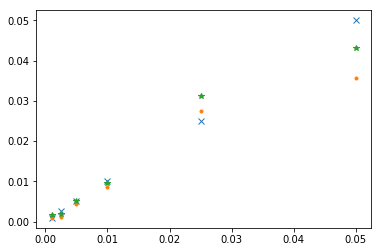

In [43]:
plt.plot(dat1.rtot,dat1.rtot,'x')
plt.plot(dat1.rtot,rt_solve,'.')
plt.plot(dat1.rtot,rtsolve_slvprm,'*')

In [44]:
parmsolve

array([   3.24993398,    1.78753556,    0.22639222,  137.70659232])

In [45]:
rtsolve_slvprm

array([ 0.00161201,  0.00180195,  0.00521894,  0.00949237,  0.03107339,
        0.04311913])

In [46]:
dat1.rtot

array([ 0.001 ,  0.0025,  0.005 ,  0.01  ,  0.025 ,  0.05  ])

In [47]:
np.abs((rtsolve_slvprm - dat1.rtot)/(dat1.rtot))

array([ 0.61201026,  0.27922036,  0.04378739,  0.05076267,  0.24293563,
        0.13761744])

In [49]:
parmslv_from_rtsolve = sp.optimize.least_squares(lsfit,guess,args=(rtsolve_slvprm,dat1.meanset[0],dat1.ligs),bounds=lsbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='trf').x

In [50]:
parmslv_from_rtsolve

array([   3.33426259,    1.82013098,    0.22695653,  153.89064419])

In [51]:
parmsolve

array([   3.24993398,    1.78753556,    0.22639222,  137.70659232])

In [52]:
g1 = np.abs(np.random.normal(1.,10.,4))
g2 = np.abs(np.random.normal(1.,10.,4))
g3 = np.abs(np.random.normal(1.,10.,4))

In [53]:
sp.optimize.least_squares(lsfit,g1,args=(rtsolve_slvprm,dat1.meanset[0],dat1.ligs),bounds=lsbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='trf').x

array([   3.33426262,    1.82013107,    0.22695648,  153.89064381])

In [54]:
sp.optimize.least_squares(lsfit,g2,args=(rtsolve_slvprm,dat1.meanset[0],dat1.ligs),bounds=lsbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='trf').x

array([   3.33426252,    1.82013123,    0.22695649,  153.89062729])

In [55]:
sp.optimize.least_squares(lsfit,g3,args=(rtsolve_slvprm,dat1.meanset[0],dat1.ligs),bounds=lsbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='trf').x

array([   3.33426282,    1.82013131,    0.22695663,  153.89071303])

In [56]:
prmstrt = np.array([10.,10.,1.,1000.])
devs = np.array([10.,10.,1.,1000.])
np.abs(np.random.normal(prmstrt,devs))

array([  2.06923351e+01,   1.78311762e+01,   1.72814425e-01,
         1.30357573e+03])

In [59]:
parmset = [np.abs(np.random.normal(prmstrt,devs)) for i in range(1000)]

In [60]:
datset = [lb.WymSim(sets=1,reps=1,parms=i) for i in parmset]

In [61]:
known_rtot = datset[1].rtot

In [62]:
known_ligs = datset[1].ligs

In [63]:
prmsols = [sp.optimize.least_squares(lsfit,guess,args=(known_rtot,i.meanset[0],known_ligs),bounds=lsbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='trf').x for i in datset]

In [66]:
pcts = np.abs(np.array(prmsols)-np.array(parmset))/np.array(parmset)

{'boxes': [<matplotlib.lines.Line2D at 0x116d2f160>,
 'caps': [<matplotlib.lines.Line2D at 0x116d5eeb8>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x116d65ba8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x116d59c18>,
  <matplotlib.lines.Line2D at 0x116d96a20>]}

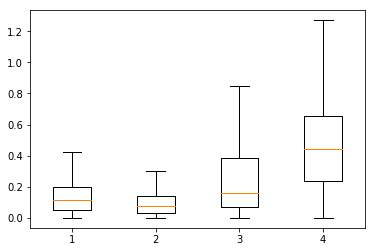

In [75]:
plt.boxplot([pcts[:,i] for i in range(4)],showfliers=False)

In [76]:
np.median(pcts,axis=0)

array([ 0.11430356,  0.07539112,  0.16197942,  0.44596016])

In [77]:
tiles = np.percentile(pcts, [16, 50, 84], axis=0)

In [78]:
tiles

array([[ 0.03470678,  0.02245045,  0.04406561,  0.14224281],
       [ 0.11430356,  0.07539112,  0.16197942,  0.44596016],
       [ 0.25411522,  0.19594896,  0.61888238,  0.75871843]])

In [79]:
datset[0].noise

0.05

In [80]:
rtslv_from_prmsols = [sp.optimize.least_squares(lsfitRTs,gRT1,args=(prmsols[i],datset[i].meanset[0],known_ligs),bounds=rtbnds,ftol=1e-14,gtol=1e-14,xtol=1e-14,method='trf').x for i in range(len(prmsols))]

In [81]:
rt_pcts = np.abs((np.array(rtslv_from_prmsols)-known_rtot))/known_rtot

In [82]:
rt_pcts[0]

array([ 0.19116598,  0.59198827,  0.25719366,  0.06907291,  0.63994221,
        0.26026624])

In [83]:
rt_tiles = np.percentile(rt_pcts, [16, 50, 84], axis=0)

In [92]:
rt_tiles[:,5]

array([ 0.05232336,  0.23404802,  0.70299108])

In [85]:
0.045/0.05

0.8999999999999999